<a href="https://colab.research.google.com/github/Aman811630/Data-Science-Internship-at-Cognifyz-Technologies/blob/main/Level_02_Conifyz_Data_Science_Internship_By_Aman_Singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Internship at Cognifyz Technologies



---



---



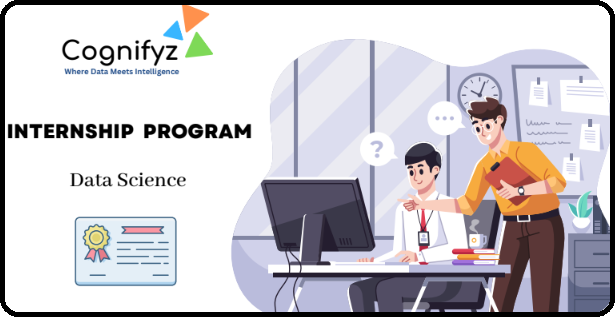

## Cognifyz : Data Science Internship
### Intern Name :- Aman Singh

# Level 02 :

---


## Task 01 :- Table Booking and Online Delivery

### Determine the percentage of restaurants that offer table booking and online delivery. Compare the average ratings of restaurants with table booking and those without. Analyze the availability of online delivery among restaurants with different price ranges.



In [67]:
# importing lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Visualization Libraries
%matplotlib inline
import seaborn as sns

# Ignore all warnings
import warnings

warnings.filterwarnings('ignore')

In [68]:
# loading data & copy  dataset
dataset=pd.read_csv("/content/drive/MyDrive/resturant.csv")
df=dataset.copy()
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [70]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [71]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

### Determine the percentage of restaurants that offer table booking and online delivery

In [72]:
df[['Restaurant ID','Restaurant Name','Has Table booking','Has Online delivery' ]].head()

,Restaurant ID,Restaurant Name,Has Table booking,Has Online delivery
0,6317637,Le Petit Souffle,Yes,No
1,6304287,Izakaya Kikufuji,Yes,No
2,6300002,Heat - Edsa Shangri-La,Yes,No
3,6318506,Ooma,No,No
4,6314302,Sambo Kojin,Yes,No


In [73]:
# Cal. total Resturant
total_resturant = len(df['Restaurant ID'].unique())

# Cal. Resturant that has table booking & then find percentage
Resturant_Has_Table_booking = len(df[df['Has Table booking'] == 'Yes']['Restaurant ID'].unique())
table_booking_percentage = Resturant_Has_Table_booking / total_resturant * 100

# Cal. Resturant that has Online delivery & then find percentage
Resturant_Has_Online_Delivery = len(df[df['Has Online delivery']== 'Yes']['Restaurant ID'].unique())
Online_Delivery_percentage =  Resturant_Has_Online_Delivery  / total_resturant * 100



# Display results in Percentage
print(f"Percentage of restaurants offering Table Booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering Online Delivery: {Online_Delivery_percentage:.2f}%")


Percentage of restaurants offering Table Booking: 12.12%
Percentage of restaurants offering Online Delivery: 25.66%


### Compare the average ratings of restaurants with table booking and those without

In [74]:
Comapre =df.groupby('Has Table booking')['Aggregate rating'].mean()
Comapre

Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


 Average rating with Table Booking: 3.44 %

Average rating without Table Booking: 2.55 %

### Analyze the availability of online delivery among restaurants with different price ranges.

In [75]:
df.groupby ('Price range')['Has Online delivery'].value_counts()


Price range  Has Online delivery
1            No                     3743
             Yes                     701
2            No                     1827
             Yes                    1286
3            No                      997
             Yes                     411
4            No                      533
             Yes                      53
Name: count, dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [77]:
# MAKEING PRICE RANGES FOR SELECTION
price_ranges=df['Average Cost for two'].apply(lambda x: 'Low' if x < 1000 else 'Medium' if 1000 <= x <= 5000 else 'High')
price_ranges.value_counts()

Average Cost for two
Low       8095
Medium    1424
High        32
Name: count, dtype: int64

In [78]:
# Analyze the availability of online delivery among restaurants with different
# price ranges.
df.groupby(price_ranges)['Has Online delivery'].value_counts().unstack()

Has Online delivery,No,Yes
Average Cost for two,,
High,32.0,NaN
Low,6081.0,2014.0
Medium,987.0,437.0


## Observations & Insights I Get till Now...


*   Percentage of restaurants offering Table Booking 12.12% and Online Delivery 25.66%.

*   Average rating with Table Booking 3.44 and without Table Booking: 2.56


*   Online delivery availability for medium price range food product is better compare to high and low price range food product.

# Task 02: Price Range Analysis

---



### Determine the most common price range among all the restaurants. Calculate the average rating for each price range. Identify the color that represents the highest average rating among different price ranges.

In [79]:
#Determine the most common price range among all the restaurants ?
# FOR THIS we can use mode and it is best suited .

a=df['Price range'].mode()[0]

print(f"Most Common Price Range: {a}")

Most Common Price Range: 1


In [80]:
#  Calculate the average rating for each price range ?

avg_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()

print("Average rating for each Price Ranges:")
print(round(avg_rating_by_price_range,2))

Average rating for each Price Ranges:
Price range
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregate rating, dtype: float64


In [81]:
# Identify the color that represents the highest average rating among different ?
df.groupby('Rating color')['Aggregate rating'].mean().sort_values(ascending=False)


Rating color
Dark Green    4.659801
Green         4.168119
Yellow        3.683429
Orange        3.051619
Red           2.297849
White         0.000000
Name: Aggregate rating, dtype: float64

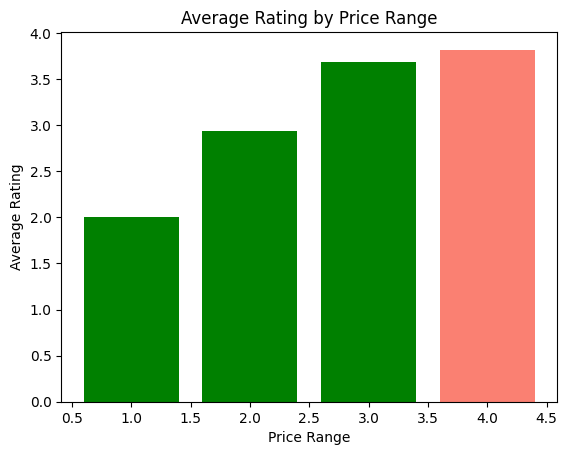

In [82]:
# Find the price range with the highest average rating
highest_avg_rating_color = avg_rating_by_price_range.idxmax()

# Create the bar plot and Set the color of the bar corresponding to the highest average rating to a distinct color (e.g., red)

plt.bar(avg_rating_by_price_range.index, avg_rating_by_price_range, color='green')
plt.bar(highest_avg_rating_color, avg_rating_by_price_range[highest_avg_rating_color], color='salmon')

# Set labels
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')
plt.show()

## Observations & Insights I Get till Now...


*   Most common price range among all the restaurants is 1

*   Price range 4 get the highest average rating, which is 3.818. Followed by price range 3, 2 and 1.



# Task 03: Feature Engineering


---



### Extract additional features from the existing columns, such as the length of the restaurant name or address.Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

### Extract additional features from the existing columns, such as the length of the restaurant name or address

In [85]:
# Create a new column for the length of restaurant names
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)

# Create a new column for the length of restaurant addresses
df['Address Length'] = df['Address'].apply(len)

# Display the updated DataFrame
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,11,64


### Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.





In [87]:
# Create columns using lambda function
df['Has Table Booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online Delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()



,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0


# Level 02 All Tasks Conclusion :-

---



---





*   Table Booking and Online Delivery:





Approximately 12.12% of restaurants offer table booking, while 25.66% provide online delivery services.
Restaurants with table booking have a significantly higher average rating of 3.44, compared to 2.56 for those without this service.
Online delivery is more prevalent in restaurants with medium-priced food products.


*   Price Range Analysis:



Price Range Analysis:

The most common price range among restaurants is 1.
Restaurants in price range 4 achieve the highest average rating at 3.818, followed by price ranges 3, 2, and 1.

*   Feature Engineering:

Introduced two new columns, 'Restaurant Name Length' and 'Address Length,' based on the length of restaurant names and addresses.
Additionally, i created two new columns, 'Has Table Booking' and 'Has Online Delivery,' by encoding categorical variables.

These findings provide valuable insights into the relationships between services, price ranges, and ratings in the restaurant dataset, enhancing our understanding of the industry.


---



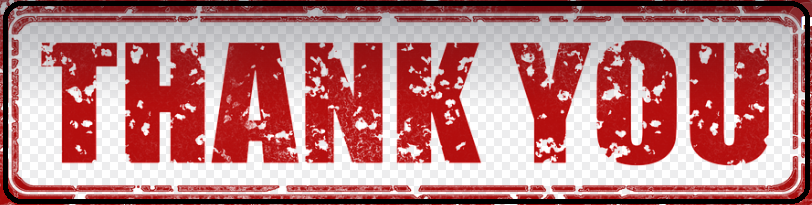